In [5]:
import numpy as np
import matplotlib.pyplot as plt

# If you have latex in your computer, you can set set this to True. 
# If you set it to True and it gives you error, just set it to False then.
plt.rcParams['text.usetex'] = False 

# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# A simple 3-class classification

## Problem definition

We start with a very simple example of classification for three classes. Although in the lecture, we used the notation $k = 1, \ldots, K$. Here, we will use $k = 0, \ldots K-1$ instead. This is to foster our understanding that it does not matter how you assign the values of the response of the examples. Only the number of classes in the classification problem is important. In fact, we can see that in our definition of the cost function that will be defined later.

We have a training set of $6$ examples and three classes $k = 0, 1, 2$. The data will be given and visualized. The classification model will be obtained by using two approaches:
1. using `sklearn` library
2. self-programmed gradient descent

We will compare the results obtained by two approaches make further comment on it.

First, let us create the data set and visualize it.

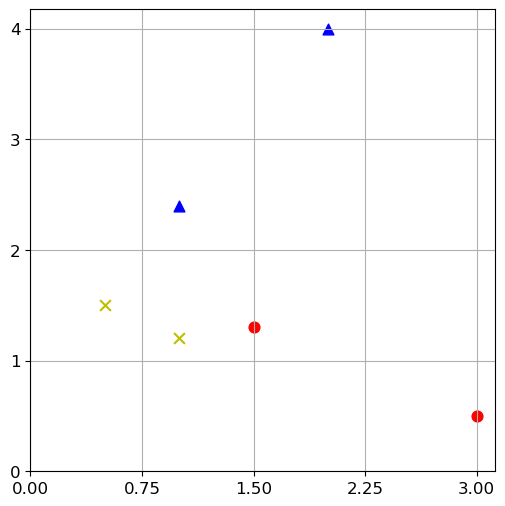

In [6]:
X_train = np.array([[0.5, 1.5], 
                     [1,  1.2], 
                     [1.5, 1.3], 
                     [3, 0.5], 
                     [2, 4], 
                     [1, 2.4]])
y_train = np.array([0, 0, 1, 1, 2, 2])
plt.figure(figsize=(6.0, 6.0))
n_classes = len(np.unique(y_train))
markers = ['x', 'o', '^']
mc = ['y', 'r', 'b']
for k in range(n_classes):
    idx = np.where(y_train == k)
    plt.scatter(X_train[idx,0], X_train[idx,1], marker=markers[k], s=60, color=mc[k])
plt.grid(True)
plt.xticks(np.linspace(0, 3, 5), fontsize=12)
plt.yticks(np.linspace(0, 4, 5), fontsize=12)
plt.show()
# you need to create the folder "figures" on the same level of this file is saved.
# plt.savefig('./figures/classification_with_three_classes.eps', bbox_inches='tight', pad_inches=0)

In [7]:
np.unique(y_train)

array([0, 1, 2])

## Train the model using `sklearn`

As before, life becomes easier by using the library `sklearn`. However, it may be surprising that `LogisticRegression` is imported from `sklearn.linear_model` as we have used the so-called softmax functions in our model representation which are nonlinear function. In fact, these softmax functions play a role as activation functions and change the input $z_{k}(\mathbf{w}_{k}, b) = \mathbf{w}\cdot \mathbf{x} + b$ fed into these softmax functions. The linear relationship $z_k = \mathbf{w} \cdot \mathbf{x} + b$ dictates how the boundary decisions are shaped. As the result, the decision boundaries are just straight lines in our example and hyperplanes are higher-dimensional problem with many more input features. Therefore, it makes sense to place `LogisticRegression` into the module `sklearn.linear_model`.

In [8]:
# Logistic Regression model imported from sklearn
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial')
lr_model.fit(X_train, y_train)     # train the model to fit the data

# The model parameters, including the coefficients 
# and the biases or the intercepts are given as attribuates
W = lr_model.coef_
b = lr_model.intercept_

print(f"W = {repr(W)}")   # we use repr to show the result is an NumPy array
print(f"b = {repr(b)}")
# The parameter W has three rows and two columns as our problem
# has 3 classes and 2 features.
print(f"W.shape = {W.shape}")
print(f"b.shape = {b.shape}")

W = array([[-0.63895478, -0.37597786],
       [ 0.62693168, -0.49725914],
       [ 0.0120231 ,  0.873237  ]])
b = array([ 1.64147984, -0.00177224, -1.6397076 ])
W.shape = (3, 2)
b.shape = (3,)


Besides the method `predict()` which gives $\widehat{y}$ as the predicted class, we also have the method `predict_proba()` which returns the probabilities $\mathrm{P}(y = k| \mathbf{x})$ that $y = k$, for all $k =1, \ldots, K$ given a particular input example $\mathbf{x}$. Note that this probability is not only for the training example but for any example in general and thus we use $\mathbf{x}$ instead of $\mathbf{x}^{(i)}$.

If `X` is a NumPy array of shape `(m, n)`, the function `LogisticRegression.predict_proba(X)` returns a NumPy array of the same shape. This array stores the probabilities of $y = k$ for all $k= 1, \ldots, K$ given the example $\mathbf{x}^{(i)}$ in the dataset defined by `X`. So, the function `predict_proba(X)` returns the matrix

\begin{equation*}
\begin{bmatrix}
\mathrm{P}(y=1|\mathbf{x}^{(1)}) & \mathrm{P}(y=2|\mathbf{x}^{(1)}) & \cdots & \mathrm{P}(y=K|\mathbf{x}^{(1)}) \\
\mathrm{P}(y=1|\mathbf{x}^{(2)}) & \mathrm{P}(y=2|\mathbf{x}^{(2)}) & \cdots & \mathrm{P}(y=K|\mathbf{x}^{(2)}) \\
\vdots & \vdots& \ddots & \vdots \\
\mathrm{P}(y=1|\mathbf{x}^{(m)}) & \mathrm{P}(y=2|\mathbf{x}^{(m)}) & \cdots & \mathrm{P}(y=K|\mathbf{x}^{(m)})
\end{bmatrix}
\end{equation*}

In [9]:
# Let us try to use both function predict()
# and predict_proba() in the following
prob = lr_model.predict_proba(X_train)

y_pred = lr_model.predict(X_train)
for i in range(len(prob)):
    print(f"Example {i+1}: [P(y = 0|x), P(y = 1|x), P(y = 2|x)] = {prob[i,:]}")
    print(f"===> {prob[i,0]:.6f} + {prob[i,1]:.6f} + {prob[i,2]:.6f} = {prob[i,:].sum()}")
    print(f"===> Example {i+1} is of class {y_pred[i]}")
    # Or we can actually get the prediction by taking the highest probability out.
    max_idx = np.argmax(prob[i,:])
    print(f"===> Highest probability with class {max_idx}")
    print("-"*60)

Example 1: [P(y = 0|x), P(y = 1|x), P(y = 2|x)] = [0.60882714 0.18480544 0.20636742]
===> 0.608827 + 0.184805 + 0.206367 = 1.0
===> Example 1 is of class 0
===> Highest probability with class 0
------------------------------------------------------------
Example 2: [P(y = 0|x), P(y = 1|x), P(y = 2|x)] = [0.52206822 0.30948051 0.16845127]
===> 0.522068 + 0.309481 + 0.168451 = 1.0
===> Example 2 is of class 0
===> Highest probability with class 0
------------------------------------------------------------
Example 3: [P(y = 0|x), P(y = 1|x), P(y = 2|x)] = [0.38327286 0.42269848 0.19402866]
===> 0.383273 + 0.422698 + 0.194029 = 1.0
===> Example 3 is of class 1
===> Highest probability with class 1
------------------------------------------------------------
Example 4: [P(y = 0|x), P(y = 1|x), P(y = 2|x)] = [0.10405607 0.84445929 0.05148464]
===> 0.104056 + 0.844459 + 0.051485 = 1.0
===> Example 4 is of class 1
===> Highest probability with class 1
-----------------------------------------

## Decision boundaries and different classification regions

The decision boundaries between two classes $C_j$ and $C_k$ are just hyperplanes given by equation
$$
\mathbf{w}_{j} \cdot \mathbf{x} + b_j = \mathbf{w}_{k} \cdot \mathbf{x} + b_k,
$$
which is equivalent to
$$
\big(\mathbf{w}_{j} - \mathbf{w}_{k}\big) \cdot \mathbf{x} + b_{j} - b_{k} = 0.
$$

In problem with only $2$ input features, this can be written as
\begin{equation*}
\mathbf{w}^{\ast} \cdot \mathbf{x} + b^{\ast} = 0
\end{equation*}
where $\mathbf{w}^{\ast}$ and $b^{\ast}$ are just obtained as the difference between two pairs $\mathbf{w}_{j}$, $\mathbf{w}_{k}$ and $b_{j}$, $b_{k}$, where $j$ and $k$ taken from $\{1, \ldots, K\}$. 

It is easy to plot these straight lines in the figure by writing them as follows
\begin{equation*}
x_{2} = -\frac{w_{1}^{\ast} x_{1} + b^{\ast}}{ w_{2}^{\ast}}
\end{equation*}
However, marking the class regions is not easy. We must consider all the possible intersection between decision boundaries and decide the class regions according to the appropriate intersections. This is rather sophitisticated. To work around this complex issue, we will use contour plot. Indeed, the model prediction just outputs discrete values for each region. If we use the surface contour plot these regions have different highs and thus must be represented by different colors. Moreover, because the entire region corresponding to one particular class is represented by one value, the entire class region is shown in one color. This is what will be achieved by the following code snippet.

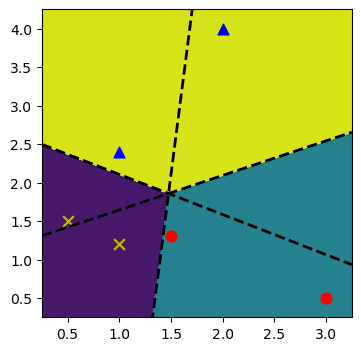

In [10]:
# As we want to plot decision boundaries again in the later computation, 
# we write all the step in one function.
def plot_decision_boundaries(X_train, y_train, predict_func, W, b):
    m, n = X_train.shape
    K = len(np.unique(y_train))
    markers = ['x', 'o', '^']  # markers for various classes
    mc = ['y', 'r', 'b']       # colors of markers
    min1, max1 = X_train[:, 0].min()-0.25, X_train[:, 0].max()+0.25
    min2, max2 = X_train[:, 1].min()-0.25, X_train[:, 1].max()+0.25
    x1 = np.linspace(min1, max1, 501)
    x2 = np.linspace(min2, max2, 501)

    xx, yy = np.meshgrid(x1, x2, indexing='ij') # you can use indexing='xy'
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((-1, 1)), r2.reshape((-1, 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    yhat = predict_func(grid)   # we will plot yhat with respect to x and y
    zz = yhat.reshape(xx.shape) # for the contourplot
    plt.contourf(xx, yy, zz)    # plot the grid of x, y and z values as a surface

    for k in range(K):
        idx = (y_train == k)
        plt.scatter(X_train[idx,0], X_train[idx,1], marker=markers[k], s=60, color=mc[k])

    W_copy = W.copy()                # we make the copy as we don't want to change the input.
    b_copy = b.copy()
    WW = np.vstack((W_copy, W_copy[0,:])) 
    bb = np.hstack((b_copy, b_copy[0]))
    xx = np.array([min1, max1])
    for k in range(K):
        yy = -((WW[k,0] - WW[k+1,0]) * xx + (bb[k] - bb[k+1])) / (WW[k,1] - WW[k+1,1])
        plt.plot(xx, yy, 'k--', lw=2.0)
    plt.axis([min1, max1, min2, max2])

plt.figure(figsize=(4, 4))
plot_decision_boundaries(X_train, y_train, lr_model.predict, lr_model.coef_, lr_model.intercept_)
# plt.savefig('./figures/three_classes_decision_boundaries.eps', bbox_inches='tight', pad_inches=0.0)

## Gradient descent

Now, let us try to program the entire logistic regression model by implementing the gradient descent by ourselves. This will be achieved by defining some important functions performing the following tasks
1. Compute the model reprensentation for the logistic regression, i.e. the probabilities that $y=k$ for all $k = 1, \ldots, K$, given input $\mathbf{x}$
2. Compute the cost function according to the formulation
\begin{equation*}
J(\mathbf{W}, b) = -\frac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} \delta_{k, y^{(i)}}\log \big[\mathrm{P}(y=k|\mathbf{x}^{(i)}) \big],
\end{equation*}
where the Kronecker $\delta_{k, s}$ is defined by
$$
\delta_{k, s} = \begin{cases}
1 & \text{if } k = s \\
0 & \text{if } k \neq s
\end{cases}
$$
3. Compute the gradient of the cost function according to the formula
$$
\begin{aligned}
\frac{\partial J}{\partial w_{kj}} &= \frac{1}{m}\sum\limits_{i=1}^{m} \bigg( \mathrm{P}(y = k| \mathbf{x}^{(i)}) - \delta_{k, y^{(i)}} \bigg) x_{j}^{(i)} \\
\frac{\partial J}{\partial b_{k}} &= \frac{1}{m}\sum\limits_{i=1}^{m} \bigg( \mathrm{P}(y = k| \mathbf{x}^{(i)}) - \delta_{k, y^{(i)}} \bigg) 
\end{aligned}
$$

In [11]:
def compute_probabilities(X, W, b):
    """
    Compute probabilites of y = k given the example x.
    """
    m, n = X.shape
    K = b.shape[0]
    Z = np.dot(W, X.T) + np.tile(b, (m, 1)).T
    G = np.exp(Z).sum(axis=0)
    proba_examples = np.zeros((m, K))
    for k in range(K):
        a = np.exp(Z[k,:])
        proba_examples[:,k] = a / G
    return proba_examples

In [12]:
# Test the function
W_test = 0.1 * np.arange(6).reshape(3, 2)
b_test = 0.125 * np.arange(3)
print(f"W_test = {W_test}")
print(f"b_test = {b_test}")

m, n = X_train.shape
K = len(np.unique(y_train))
proba_examples = compute_probabilities(X_train, W_test, b_test)
print(proba_examples)

print(np.sum(proba_examples, axis=1))

W_test = [[0.  0.1]
 [0.2 0.3]
 [0.4 0.5]]
b_test = [0.    0.125 0.25 ]
[[0.18024156 0.30469094 0.5150675 ]
 [0.17079115 0.30049811 0.52871074]
 [0.144527   0.28670859 0.56876442]
 [0.11780144 0.26880884 0.61338972]
 [0.05286467 0.1988867  0.74824863]
 [0.12136647 0.27145997 0.60717356]]
[1. 1. 1. 1. 1. 1.]


In [13]:
def compute_cost(X, y, W, b):
    """
    Compute cost function for multinomial logistic regression
    """
    m, n = X.shape
    K = len(np.unique(y))
    proba_examples = compute_probabilities(X, W, b)
    cost = 0
    for i in range(m):
        for k in range(K):
            cost += np.float64(y[i] == k) * np.log(proba_examples[i,k])
    cost = - cost/m
    return cost

# Test the function
compute_cost(X_train, y_train, W_test, b_test)

1.138795907158608

In [14]:
def compute_cost_grad(X, y, W, b):
    """
    Compute the gradient of the cost function for multinomial logistic regression
    """
    m, n = X.shape
    K = len(np.unique(y))
    proba_examples = compute_probabilities(X, W, b)
    dJ_dW = np.zeros((K, n))
    dJ_db = np.zeros(K)
    for k in range(K):
        for i in range(m):
            for j in range(n):
                dJ_dW[k,j] += (proba_examples[i,k] - np.double(y[i] == k)) * X[i,j]
                
            dJ_db[k] += (proba_examples[i,k] - np.double(y[i] == k))
    
    dJ_dW = dJ_dW / m
    dJ_db = dJ_db / m
    
    return dJ_dW, dJ_db
# We shall test this function and justify the correctness of this function soon.

### Justify gradient computation by comparison with finite difference approximation

It is always important to make sure that the implementation of computing the gradient of the cost function is correct. Otherwise, it is hard, if not impossible, to make the gradient descent algorithm work. A standard method is to compare the results given by the function we defined with the results obtained by using finite difference approximation.

Assume that $f = f(x_1, \ldots, x_n)$ is a function of multiple variables $\mathbf{x} = (x_1, \ldots, x_n)$. Then the partial derivative at $\mathbf{x}$ can be approximated (up to second order approximation) by the central finite difference formula
\begin{equation*}
\frac{\partial f}{\partial x_{j}}(\mathbf{x}) \approx \frac{f(x_1, \ldots, x_j + \varepsilon, \ldots, x_n) - f(x_1, \ldots, x_j - \varepsilon, \ldots, x_n)}{2\varepsilon},
\end{equation*}
with $\varepsilon$ being a very small number.

In [15]:
eps = 1e-6
dJ_dW_fd = np.ndarray((K, n))   # fd stands for finite difference
dJ_db_fd = np.ndarray((K))      
for k in range(K):
    for j in range(n):
        w_plus = W_test.copy()
        w_plus[k, j] += eps
        
        w_minus = W_test.copy()
        w_minus[k, j] -= eps
        
        J_plus = compute_cost(X_train, y_train, w_plus, b_test)
        J_minus = compute_cost(X_train, y_train, w_minus, b_test)
        dJ_dW_fd[k, j] = (J_plus - J_minus) / (2*eps)
        
    b_plus = b_test.copy()
    b_minus = b_test.copy()
    b_plus[k] += eps
    b_minus[k] -= eps
    J_plus = compute_cost(X_train, y_train, W_test, b_plus)
    J_minus = compute_cost(X_train, y_train, W_test, b_minus)
    dJ_db_fd[k] = (J_plus - J_minus) / (2*eps)
    
print("Finite difference approximation:\n")
print(f"dJ/dW = {dJ_dW_fd}\n")        # fd stands for finite difference
print(f"dJ/db = {dJ_db_fd}")
print("="*50)

# They are almost equal (many other digits have not been shown) 
# to the results by using the function
# compute_cost_grad()
print("With exact formulation:\n")
dJ_dW, dJ_db = compute_cost_grad(X_train, y_train, W_test, b_test)
print(f"dJ/dW = {dJ_dW}\n")
print(f"dJ/db = {dJ_db}")
print("="*50)

print("Difference in dJ/dW =\n", dJ_dW - dJ_dW_fd)

Finite difference approximation:

dJ/dW = [[-0.07363291 -0.24586071]
 [-0.35690561  0.16196841]
 [ 0.43053851  0.0838923 ]]

dJ/db = [-0.20206795 -0.06149114  0.26355909]
With exact formulation:

dJ/dW = [[-0.07363291 -0.24586071]
 [-0.35690561  0.16196841]
 [ 0.43053851  0.0838923 ]]

dJ/db = [-0.20206795 -0.06149114  0.26355909]
Difference in dJ/dW =
 [[-4.29389579e-11 -1.07049619e-10]
 [-2.04836148e-11 -4.71403472e-12]
 [ 6.34226005e-11  1.11763723e-10]]


### Implement the gradient descent algorithm

Now, we are ready to implement the gradient descent.

In [22]:
def gradient_descent(X, y, W_init, b_init, alpha=0.1, tol=1e-4, max_iters=1000):
    history = {'W': [], 'b': [], 'J': []}
    W = W_init
    b = b_init
    for step in range(max_iters):
        dJ_dW, dJ_db = compute_cost_grad(X, y, W, b)
        # Update the parameters
        W = W - alpha * dJ_dW
        b = b - alpha * dJ_db
        
        history['W'].append(W)
        history['b'].append(b)
        history['J'].append(compute_cost(X, y, W, b))
        
        if step > 2:
            res1 = np.abs(history['J'][-1] - history['J'][-2])
            res2 = np.abs(history['J'][-1] - history['J'][-2]) / np.abs(history['J'][-1])
            if res1 < tol or res2 < tol:
                print(f"Solver converges at step = {step}")
                break
    
    if step == max_iters:
        print(f"Solver does not converge until step = {step}")
        
    return W, b, history

Solver converges at step = 39607


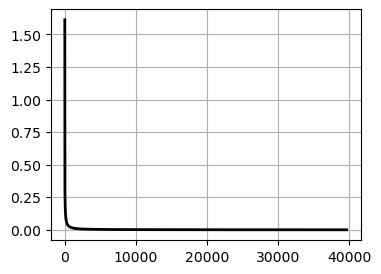

In [36]:
np.random.seed(42)
W0 = np.random.randn(3, 2)
b0 = np.random.randn(3)

W_final, b_final, history = gradient_descent(X_train, y_train, 
                                             W_init=W0, b_init=b0, 
                                             alpha=1.5, tol=1e-8, max_iters=np.int64(1e5))

plt.figure(figsize=(4, 3))
plt.plot(history['J'], 'k-', lw=2)
plt.grid(True)

In [37]:
print(f"W_final = {W_final}")
print(f"b_final = {b_final}")

W_final = [[-12.30127306  -2.57099499]
 [ 17.12028221  -7.58483821]
 [ -3.90875984  11.3064618 ]]
b_final = [ 21.94792301  -8.44732687 -11.62342298]


### Comparison with the results obtained by `sklearn`

Let us make comparison between the results by our gradient denscent and those by the **sklearn** library.

In [38]:
print("From sklearn:\n")
print(lr_model.coef_)
print(lr_model.intercept_)
print(repr(lr_model.predict(X_train)))
print("="*50)

From sklearn:

[[-0.63895478 -0.37597786]
 [ 0.62693168 -0.49725914]
 [ 0.0120231   0.873237  ]]
[ 1.64147984 -0.00177224 -1.6397076 ]
array([0, 0, 1, 1, 2, 2])


In [39]:
example_prob = compute_probabilities(X_train, W_final, b_final)
np.argmax(example_prob, axis=1)

array([0, 0, 1, 1, 2, 2], dtype=int64)

In [40]:
def predict(X, W, b):
    example_prob = compute_probabilities(X, W, b)
    return np.argmax(example_prob, axis=1)

def predict_(X):
    return predict(X, W_final, b_final)

print("From our gradient descent:\n")
print(W_final)
print(b_final)
print(repr(predict(X_train, W_final, b_final)))
print("="*50)

From our gradient descent:

[[-12.30127306  -2.57099499]
 [ 17.12028221  -7.58483821]
 [ -3.90875984  11.3064618 ]]
[ 21.94792301  -8.44732687 -11.62342298]
array([0, 0, 1, 1, 2, 2], dtype=int64)


We can clearly see that the results are not the same. However, before making commments, let us try to visualize the decision boundaries.

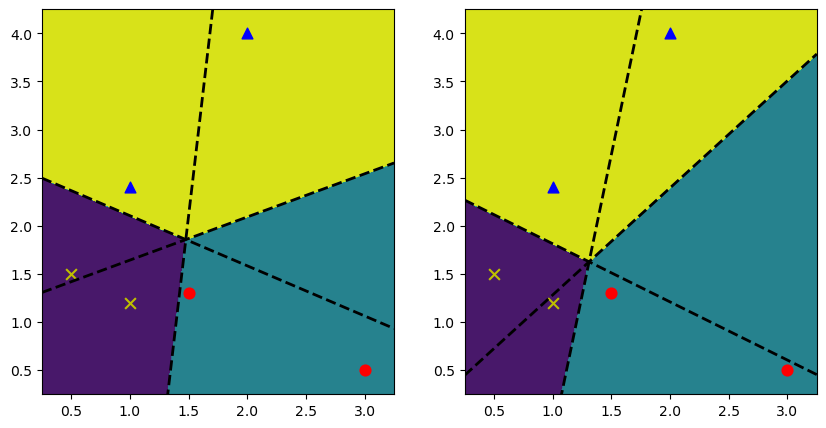

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plot_decision_boundaries(X_train, y_train, lr_model.predict, lr_model.coef_, lr_model.intercept_)

plt.subplot(122)
plot_decision_boundaries(X_train, y_train, predict_func=predict_, W=W_final, b=b_final)

Clearly, the decision boundaries are different but both results show excellent prediction power. What makes the two results different?

In fact, the `LogisticRegression` from `sklearn` we have used so far already implemeted the $L^2$ regularization. That is, the cost function includes also the regularization term of the form
$$
\frac{1}{C}\, \|\mathbf{W}\|^2 = \frac{1}{C} \sum\limits_{k}\sum\limits_{j} w_{kj}^2 
$$
This makes the two minimization problems for obtaining the logistic regression models are not the same and thus the outcomes are not identical.

Now, let us try to play around with LogisticRegression from `sklearn`. You can see that the constructor of `LogisticRegression` has multiple input arguments and all of them are default arguments. That is, you can perfectly define

```Python
lr = LogisticRegression()
```
without using any input arguments. All the arguments will take their corresponding values.

[Official documentation: Click on me](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [42]:
lr_without_reg = LogisticRegression(multi_class='multinomial', penalty=None,
                                    solver='newton-cg',
                                    max_iter=np.uint64(1e3), tol=1e-4)
lr_without_reg.fit(X_train, y_train)
lr_without_reg.predict(X_train)

array([0, 0, 1, 1, 2, 2])

In [43]:
lr_without_reg.coef_, lr_without_reg.intercept_

(array([[-16.45694355,  -3.34324987],
        [ 21.9824301 , -10.46999867],
        [ -5.52548655,  13.81324854]]),
 array([ 27.09793753, -11.89765591, -15.20028162]))

In [44]:
W_final, b_final

(array([[-12.30127306,  -2.57099499],
        [ 17.12028221,  -7.58483821],
        [ -3.90875984,  11.3064618 ]]),
 array([ 21.94792301,  -8.44732687, -11.62342298]))

In [45]:
lr_without_reg.coef_ / W_final

array([[1.33782442, 1.30037199],
       [1.28399928, 1.38038524],
       [1.41361628, 1.22171275]])

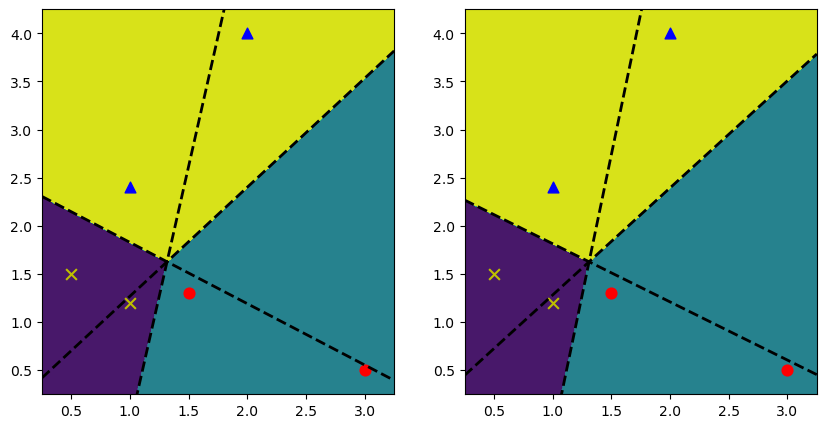

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_decision_boundaries(X_train, y_train, lr_without_reg.predict, lr_without_reg.coef_, lr_without_reg.intercept_)

plt.subplot(122)
plot_decision_boundaries(X_train, y_train, predict_func=predict_, W=W_final, b=b_final)